# ALUNOS:

- Aluno1: Antonio______________________________________
- Aluno2: Danilo______________________________________
- Aluno3: Pedro_____________________________________


# CIÊNCIA DE DADOS

## Etapas previstas para realizar Análise Exploratória dos Dados:
- Importar as bibliotecas necessárias
- Importar a base de dado e realizar o merge, caso necessário
- Visualização dos dados
- Elaborar gráficos PairPlot
- Gráfico Outlier
- Gráfico Heatmap
- Conclusões obtidas

## Análise de Custos e Desperdícios de Materiais

O desafio consiste no gerenciamento de recursos próprios: controlar custos crescentes, evitar desperdícios e garantir que os insumos sejam utilizados de forma eficiente e adequada. Os dados de consumo mensal trazem informações ricas sobre materiais, medicamentos, operações, centros de custo, especialidades médicas e estabelecimentos. A partir deles, é possível identificar
padrões de uso, prever demandas futuras e, principalmente, analisar perdas e desperdícios. Neste
desafio, os alunos deverão aplicar os conhecimentos adquiridos em sala de aula para explorar essas
informações e propor soluções práticas que apoiem a gestão hospitalar.

## Mineração de Dados
- Explorar e preparar os dados de consumo mensal.
- Mapear itens com maior impacto financeiro e identificar padrões de consumo por material, operação, centro de custo e especialidade.
- Consumos atípicos (picos sazonais não justificados).
- Itens subutilizados ou de baixa rotatividade.
- Identificar itens similares (ex.: medicamentos com a mesma finalidade terapêutica) e avaliar sobreposição de consumo.

## Inteligência Artificial
- Desenvolver modelos de previsão de consumo
- Aplicar metodologias para agrupar especialidades e centros de custo com padrões de consumo semelhantes.
- Implementar detecção de anomalias para identificar consumos desproporcionais, potenciais desperdícios e possíveis substituições por itens similares de menor custo.

## Resultados Esperados:
- Evolução do consumo mensal.
- Comparativo de consumo.
- Indicadores de perdas e desperdícios (consumo anômalo, estoques sem giro, itens de alto custo com alternativas similares).
- Previsão de consumo para apoiar planejamento de compras.
- Grupos de especialidades/centros de custo com padrões de consumo similares.
- Lista de possíveis anomalias e desperdícios detectados.
- Recomendações estratégicas para otimização do uso de recurso próprio.
Bônus: outras analises não indicadas acima

# Importar e visualizar a base

In [1]:
# Importar as bibliotecas necessárias para solucionar o probema
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar a base de dados
df_merged = 'data/df_merged_tratado.parquet'

try:
  df = pd.read_parquet(df_merged)
  print("carregou!")
except FileNotFoundError:
  print(f"nao achou {df_merged}")
except Exception as e:
  print(f"erro {e}")

carregou!


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877455 entries, 0 to 4877454
Data columns (total 25 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   ds_centro_custo            category      
 1   ds_estabelecimento         category      
 2   cd_acao                    int64         
 3   nr_atendimento             int64         
 4   dt_movimento_estoque       datetime64[ns]
 5   ds_local_estoque           category      
 6   cd_conta_contabil          object        
 7   ds_operacao                category      
 8   dt_referencia              datetime64[ns]
 9   qt_estoque                 float64       
 10  vl_estoque                 float64       
 11  vl_movimento               float64       
 12  vl_consumo                 float64       
 13  qt_consumo                 float64       
 14  id_item                    int64         
 15  ds_material_hospital       category      
 16  ie_ativo                   bool     

None

In [ ]:
# Visualizar as bases
pd.set_option('display.max_columns', None)
# Exibir as primeiras linhas do DataFrame
print("Primeiras 5 linhas do DataFrame:")
display(df.head())

Primeiras 5 linhas do DataFrame:


,ds_centro_custo,ds_estabelecimento,cd_acao,nr_atendimento,dt_movimento_estoque,ds_local_estoque,cd_conta_contabil,ds_operacao,dt_referencia,qt_estoque,vl_estoque,vl_movimento,vl_consumo,qt_consumo,id_item,ds_material_hospital,ie_ativo,ds_classe_material,ds_subgrupo_material,ds_grupo_material,qt_conv_estoque_consumo,dt_cadastramento,ds_unidade_medida_compra,ds_unidade_medida_estoque,ds_unidade_medida_consumo
0,Posto Carambeí,Laboratorio Unimed Ponta Grossa,1,0,2024-10-17 15:46:02,Posto Carambeí,71111911113905.0,Consumo,2024-10-01,1.00,1.89,1.89,1.89,1.00,6910249862,"Pilha Pequena ""AA"" Alcalina",True,Material de Expediente,Material de Expediente,Impressos e Material de Expediente,1.00,2007-08-31 09:05:52,Unidade,Unidade,Unidade
1,SADT - RADIOLOGIA,Hospital Geral Unimed,1,0,2024-10-17 13:49:55,Almoxarifado,71111911113905.0,Consumo,2024-10-01,3.00,64.35,64.35,64.35,3.00,6910242281,Papel Sulfite A4 Branco 210x297mm Pcte com 500...,True,Material de Expediente,Material de Expediente,Impressos e Material de Expediente,1.00,2006-10-23 09:02:51,Pacote,Pacote,Pacote
2,Coleta Ambulatorial,Laboratorio Unimed Ponta Grossa,1,0,2024-10-09 10:29:11,Almoxarifado Laboratório,71111911113103.0,Consumo,2024-10-01,500.00,13.35,13.35,13.35,500.00,6910236215,Stopper Cor da pele,True,Curativos,Curativos,Materiais Hospitalares,1.00,2009-06-10 18:23:32,Peça,Peça,Peça
3,3º ANDAR - UNIDADE DE INTERNAÇÃO,Hospital Geral Unimed,1,0,2024-10-17 14:04:47,Almoxarifado,71111911113905.0,Consumo,2024-10-01,20.00,44.00,44.00,44.00,20.00,6910269295,"Folha A4 com 8 etiquetas tamanho 7,5x10 cm Quí...",True,Material de Expediente,Material de Expediente,Impressos e Material de Expediente,1.00,2019-06-24 15:40:59,Folha,Folha,Folha
4,3º ANDAR - UNIDADE DE INTERNAÇÃO,Hospital Geral Unimed,1,0,2024-10-17 14:04:47,Almoxarifado,71111911113905.0,Consumo,2024-10-01,1.00,1.82,1.82,1.82,1.00,6910216810,Pincel Azul p/ Quadro Branco,True,Material de Expediente,Material de Expediente,Impressos e Material de Expediente,1.00,2000-08-23 16:21:57,Unidade,Unidade,Unidade


## Visualizando um resumo das informações


In [ ]:
# Verificando o domínio dos dados


colunas_naonumericas = [
    'ds_centro_custo',
    'ds_estabelecimento',
    'ds_operacao',
    'ds_classe_material',
    'ds_subgrupo_material',
    'ds_material_hospital',
    'ds_grupo_material'
]

print("Verificando domínio das colunas nao numericas:")
display(df[colunas_naonumericas].describe())


print("\nVerificando domínio das colunas numéricas:")
# desativando a notação científica
pd.options.display.float_format = '{:.2f}'.format
display(df.describe())

Verificando domínio das colunas nao numericas:


,ds_centro_custo,ds_estabelecimento,ds_operacao,ds_classe_material,ds_subgrupo_material,ds_material_hospital,ds_grupo_material
count,4877455,4877455,4877455,4877455,4877455,4877455,4877455
unique,218,5,12,303,97,3623,16
top,CENTRO CIRÚRGICO,Hospital Geral Unimed,Execução Prescrição,Seringas Descartaveis,"Aparelho digestivo, metabolismo e nutrição",Agulha descartável 25 x 12 SEM dispositivo de ...,Materiais Hospitalares
freq,962092,4807855,4468447,819588,926257,540976,2725316



Verificando domínio das colunas numéricas:


,cd_acao,nr_atendimento,dt_movimento_estoque,dt_referencia,qt_estoque,vl_estoque,vl_movimento,vl_consumo,qt_consumo,id_item,qt_conv_estoque_consumo,dt_cadastramento
count,4877455.00,4877455.00,4877455,4877455,4877455.00,4877455.00,4877455.00,4877455.00,4877455.00,4877455.00,4877455.00,4877455
mean,1.00,2213195.64,2024-01-19 12:35:03.513988096,2024-01-04 04:57:14.541661184,3.02,22.20,22.20,20.43,2.90,3448800563.06,8.32,2004-10-15 05:32:43.485042304
min,1.00,0.00,2011-07-22 10:00:00,2023-01-01 00:00:00,-3600.00,-35475.00,-35475.00,-71357.13,-3600.00,691022.00,1.00,1997-07-24 15:11:55
25%,1.00,2050964.00,2023-07-24 19:29:44,2023-07-01 00:00:00,1.00,0.42,0.42,0.34,1.00,69102238.00,1.00,1997-09-30 20:59:47
50%,1.00,2290827.00,2024-02-01 20:20:55,2024-02-01 00:00:00,1.00,1.22,1.22,1.06,1.00,691024242.00,1.00,1998-02-16 13:15:59
75%,1.00,2471558.00,2024-07-20 09:30:43,2024-07-01 00:00:00,1.00,4.15,4.15,3.93,1.00,6910252139.00,1.00,2011-06-01 14:32:19
max,2.00,2635382.00,2024-12-31 23:53:10,2024-12-01 00:00:00,990000.00,376210.29,376210.29,376210.29,990000.00,6910279674.00,9100.00,2024-12-06 15:16:01
std,0.02,431378.68,NaN,NaN,449.47,970.88,970.88,967.74,449.44,3351503522.61,86.88,NaN


#Filtrando a base para os 20 materias mais consumidos e os 20 com maior valor

In [ ]:
mapa_operacoes = {
    'Consumo': 'Saída',
    'Execução Prescrição': 'Saída',
    'Devolução Paciente': 'Entrada',
    'Devolução Doação - Consumo': 'Entrada',
    'Quebras e Contaminações': 'Saída',
    'Quebras/Contaminação Med Controlados': 'Saída',
    'Produtos vencidos': 'Saída',
    'Medicamentos Controlados Vencidos': 'Saída',
    'Perdas e Quebras': 'Saída',
    'Doações - saída': 'Saída',
    'Sobras por estabilidade': 'Entrada',
    'Perdas por estabilidade': 'Saída',
    'Saída por troca comercial': 'Saída'
}


df['tipo_operacao'] = df['ds_operacao'].map(mapa_operacoes)

df_ag = df[df['tipo_operacao'] == 'Saída'].copy()

print(df_ag[['ds_operacao', 'tipo_operacao']].drop_duplicates().to_string(index=False))

                         ds_operacao tipo_operacao
                             Consumo         Saída
                 Execução Prescrição         Saída
             Quebras e Contaminações         Saída
Quebras/Contaminação Med Controlados         Saída
                   Produtos vencidos         Saída
   Medicamentos Controlados Vencidos         Saída
                    Perdas e Quebras         Saída
                     Doações - saída         Saída
             Perdas por estabilidade         Saída
           Saída por troca comercial         Saída


In [ ]:
#Soma líquida = movimentos (positivos) – estornos (negativos)

df_saldos = (
    df_ag.groupby('ds_material_hospital', as_index=False)
    .agg(vl_consumo=('vl_consumo', 'sum'),
         qt_consumo=('qt_consumo', 'sum'))
)

top20_qtd = df_saldos.nlargest(20, 'qt_consumo')['ds_material_hospital'].tolist()
top20_valor = df_saldos.nlargest(20, 'vl_consumo')['ds_material_hospital'].tolist()

# União dos dois conjuntos
top20_union = list(set(top20_qtd + top20_valor))

# Conferir as 5 primeiras linhas da consolidação
df_saldos.head()

/tmp/ipython-input-2402386007.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ag.groupby('ds_material_hospital', as_index=False)


,ds_material_hospital,vl_consumo,qt_consumo
0,"""T"" 100mm",0.00,0.00
1,"""T"" 20x10 mm Linha E",0.00,0.00
2,"""T"" 25mm agua fria",0.00,0.00
3,"""T"" 25mm agua fria L/R Redução para 1/2",0.00,0.00
4,"""T"" 40mm",0.00,0.00


In [ ]:
#verificando
# Total de registros antes e depois do filtro
print(f"Registros totais: {len(df)}")
print(f"Registros filtrados (Saída): {len(df_ag)}")

# Percentual de Saídas
print(f"Proporção de Saídas: {len(df_ag)/len(df):.1%}")

# Quantos produtos únicos foram encontrados
print(f"Produtos únicos na base de saldos: {df_saldos['ds_material_hospital'].nunique()}")

Registros totais: 4877455
Registros filtrados (Saída): 4601090
Proporção de Saídas: 94.3%
Produtos únicos na base de saldos: 35830


In [ ]:
#Selecionar os top 20
top20_qtd = df_saldos.nlargest(20, 'qt_consumo')
top20_valor = df_saldos.nlargest(20, 'vl_consumo')

display(top20_qtd[['ds_material_hospital','qt_consumo']])
display(top20_valor[['ds_material_hospital','vl_consumo']])


,ds_material_hospital,qt_consumo
20771,Luva para procedimento - Pequena,1882147.00
973,Adoçante Pó Sachê Sem Sacarose,998991.00
20768,Luva para procedimento - Média,867182.00
1455,Agulha descartável 25 x 12 SEM dispositivo de ...,656641.00
30122,Seringa descartável 10mL (slip),401524.00
31214,"Soro fisiológico 0,9% inj. ampola c/ 10mL",395355.00
21552,Mascara tripla com elástico e clips,375443.00
28221,Pulseira de Identificação Branca Tyvek Persona...,294300.00
30130,Seringa descartável 5mL - (slip),237766.00
2809,Avental descartavel Manga Longa TNT branco 30g,224400.00


,ds_material_hospital,vl_consumo
29365,SPINRAZA (nusinersena) 12mg/5ml - Sol inj 5ml,8693474.20
18986,KEYTRUDA 100 mg de pembrolizumabe em embalagem...,5057173.08
13309,Enhertu 100mg - pó liof. FA,2594022.47
23687,Opdivo 100 mg - solução injetável,2313642.41
17795,"IMFINZI 500 mg/10mL - sol. inj., FA (10 mL)",2296084.46
25376,Perjeta 420mg - sol. inj. FA (14ml),2200062.76
35062,Verzenios 150 mg - comp. revestido,1865581.80
19041,Kadcyla 100mg - pó liof. FA,1832439.31
30581,"Simponi 50mg /0,5ml inj.",1395608.99
31283,Stelara 90mg /1mL,1295613.64


In [ ]:
top20_union = list(set(top20_qtd['ds_material_hospital']).union(set(top20_valor['ds_material_hospital'])))
df_recorte = df[df['ds_material_hospital'].isin(top20_union)].copy()


print(f"Produtos no recorte: {df_recorte['ds_material_hospital'].nunique()}")
print(f"Linhas no recorte: {len(df_recorte)}")


Produtos no recorte: 40
Linhas no recorte: 2139525


In [ ]:
perc_valor = df_recorte['vl_consumo'].sum() / df_ag['vl_consumo'].sum()
perc_qtd   = df_recorte['qt_consumo'].sum() / df_ag['qt_consumo'].sum()

print(f"Cobertura em valor: {perc_valor:.1%}")
print(f"Cobertura em quantidade: {perc_qtd:.1%}")

Cobertura em valor: 39.9%
Cobertura em quantidade: 53.8%


#Cobertura do recorte de produtos:
###Os 20 produtos mais relevantes em termos de consumo (valor e quantidade) foram responsáveis por 53,8 % das unidades movimentadas e 39,9 % do valor total consumido.
###Isso demonstra que a maior parte dos custos e movimentações se concentra em um conjunto reduzido de materiais, o que justifica o recorte para análises exploratórias e modelagens preditivas, mantendo representatividade sem comprometer desempenho computacional.

In [ ]:
#salvar df_recorte na pasta data

df_recorte.to_parquet('/content/drive/MyDrive/data/df_recorte.parquet', index=False)
# df_recorte.to_csv('df_recorte.csv', index=False)

## O boxplot
- Permite visualizar os percentis e valores máximo e mínimo dos dados
- Permite visualizar, além de simetria e dispersão dos dados, valores extremos (outliers)
- O valor máximo e mínimo são calculados baseado no interquartil

In [ ]:
# Ler df_recorte
df_recorte = pd.read_parquet('/content/drive/MyDrive/data/df_recorte.parquet')

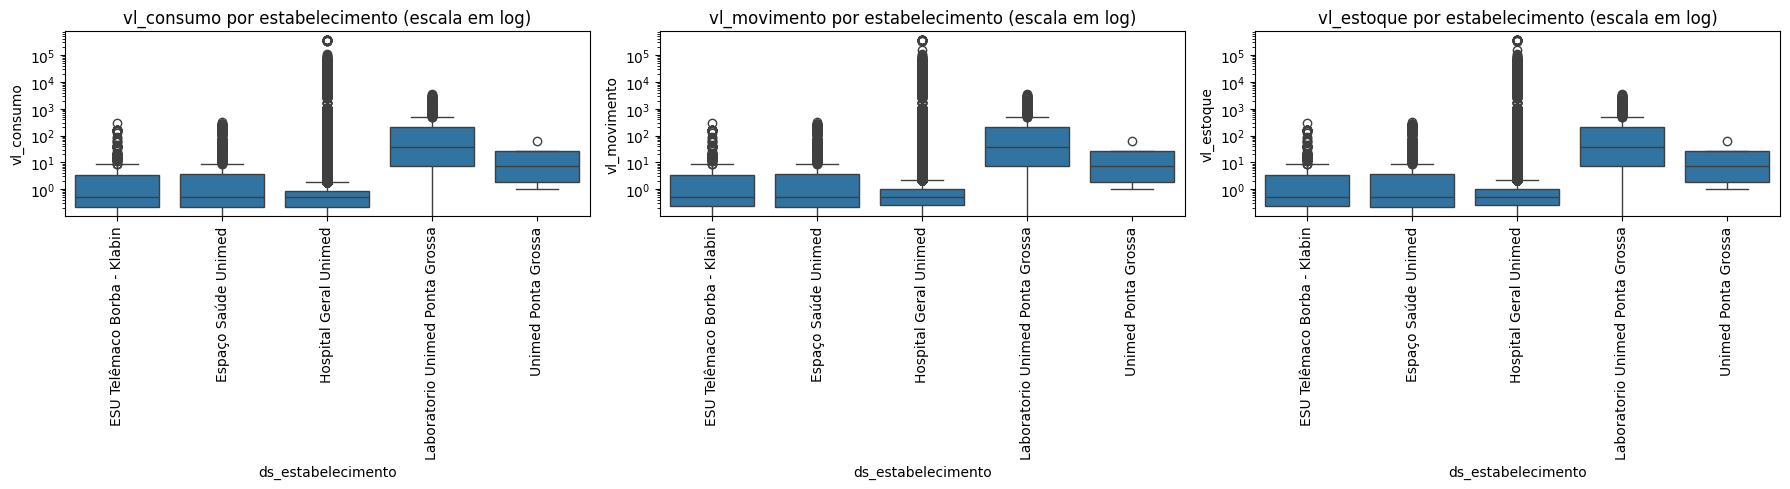

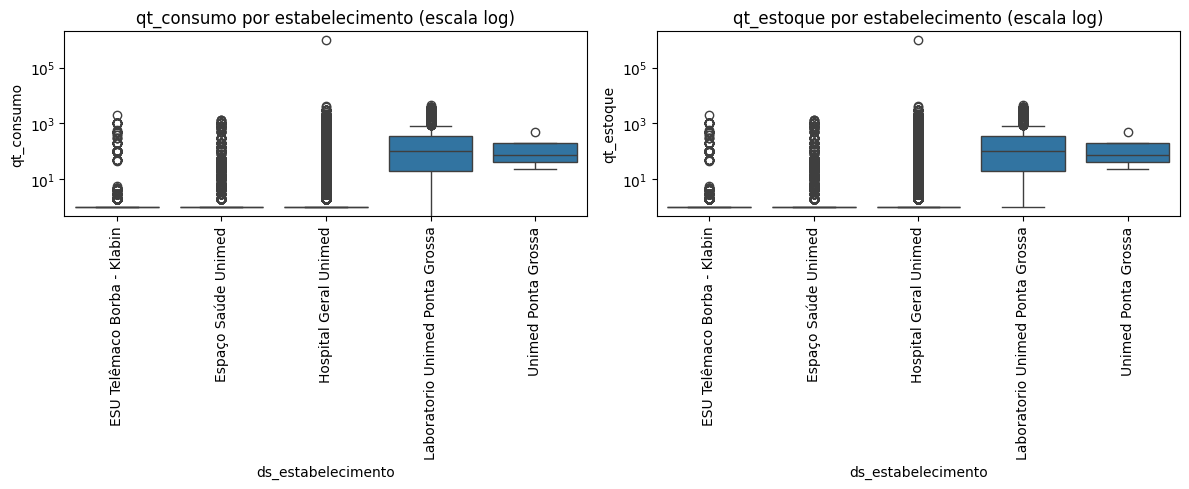

In [ ]:
# Selecione 5 principais colunas da base e apresente seu boxplot


# Filtro: considerar apenas movimentações reais (não estornos)
df_filtrado = df_recorte[df_recorte['cd_acao'] == 1]

# Colunas principais para análise
colunas_boxplot = ['vl_consumo', 'vl_movimento', 'vl_estoque', 'qt_consumo', 'qt_estoque']

# Configurar a figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), tight_layout=True)

for i, coluna in enumerate(colunas_boxplot[:3]):
    sns.boxplot(x='ds_estabelecimento', y=coluna, data=df_filtrado, ax=axes[i])
    #aplicando escala em log
    axes[i].set_yscale('log')
    axes[i].set_title(f'{coluna} por estabelecimento (escala em log)')
    axes[i].tick_params(axis='x', rotation=90)

plt.show()

# Segunda linha com as duas variáveis restantes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), tight_layout=True)

for i, coluna in enumerate(colunas_boxplot[3:]):
    sns.boxplot(x='ds_estabelecimento', y=coluna, data=df_filtrado, ax=axes[i])
    axes[i].set_yscale('log')
    axes[i].set_title(f'{coluna} por estabelecimento (escala log)')
    axes[i].tick_params(axis='x', rotation=90)

plt.show()

In [ ]:
# Determinando o interquartil
## Duas colunas principais
colunas = ['vl_consumo', 'qt_consumo']
# Dicionário para armazenar resultados
iqr_info = {}

for col in colunas:
    Q1 = df_recorte[col].quantile(0.25)
    Q3 = df_recorte[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_info[col] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR}

pd.DataFrame(iqr_info).T

,Q1,Q3,IQR
vl_consumo,0.22,0.90,0.68
qt_consumo,1.00,1.00,0.00


In [ ]:
# Calculando o valor máximo e mínimo
for col in colunas:
    Q1 = df_recorte[col].quantile(0.25)
    Q3 = df_recorte[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    print(f"\n{col.upper()}")
    print(f"Q1 = {Q1:,.2f}")
    print(f"Q3 = {Q3:,.2f}")
    print(f"IQR = {IQR:,.2f}")
    print(f"Limite inferior = {lim_inf:,.2f}")
    print(f"Limite superior = {lim_sup:,.2f}")




VL_CONSUMO
Q1 = 0.22
Q3 = 0.90
IQR = 0.68
Limite inferior = -0.80
Limite superior = 1.92

QT_CONSUMO
Q1 = 1.00
Q3 = 1.00
IQR = 0.00
Limite inferior = 1.00
Limite superior = 1.00


In [ ]:
# Verificando a quantidade de registros em cada intervalo
# (<Q1, entre Q1 e Q2, entre Q2 e Q3,>Q3). Selecione apenas duas principais coluna
for col in colunas:
    Q1 = df_recorte[col].quantile(0.25)
    Q2 = df_recorte[col].quantile(0.50)  # mediana
    Q3 = df_recorte[col].quantile(0.75)

    print(f"\nDistribuição de {col}:")
    print(f"Menor que Q1: {(df_recorte[col] < Q1).sum()}")
    print(f"Entre Q1 e Q2: {((df_recorte[col] >= Q1) & (df_recorte[col] < Q2)).sum()}")
    print(f"Entre Q2 e Q3: {((df_recorte[col] >= Q2) & (df_recorte[col] < Q3)).sum()}")
    print(f"Maior que Q3: {(df_recorte[col] > Q3).sum()}")




Distribuição de vl_consumo:
Menor que Q1: 513519
Entre Q1 e Q2: 547216
Entre Q2 e Q3: 540218
Maior que Q3: 529167

Distribuição de qt_consumo:
Menor que Q1: 133193
Entre Q1 e Q2: 0
Entre Q2 e Q3: 0
Maior que Q3: 370464


In [ ]:
# Faça o tratamento dos outliers identificados

# Cópia da base para não alterar o original
df_tratado = df_recorte.copy()

# Limites calculados pelo IQR
lim_inf_vl = -0.80
lim_sup_vl = 1.92

# Capping: limita valores extremos de vl_consumo
df_tratado['vl_consumo'] = np.where(
    df_tratado['vl_consumo'] > lim_sup_vl, lim_sup_vl,
    np.where(df_tratado['vl_consumo'] < lim_inf_vl, lim_inf_vl, df_tratado['vl_consumo'])
)

# Marcação de possíveis outliers de qt_consumo (IQR = 0 → maioria igual a 1)
df_tratado['is_outlier_qt'] = np.where(df_tratado['qt_consumo'] != 1, True, False)

# Resumo após tratamento
print("Tratamento concluído.\n")
print("Resumo VL_CONSUMO:")
print(df_tratado['vl_consumo'].describe())
print("\nOutliers em QT_CONSUMO:", df_tratado['is_outlier_qt'].sum())


Tratamento concluído.

Resumo VL_CONSUMO:
count   2139525.00
mean          0.69
std           0.70
min          -0.80
25%           0.22
50%           0.50
75%           0.90
max           1.92
Name: vl_consumo, dtype: float64

Outliers em QT_CONSUMO: 503657


### Resultado do tratamento dos outliers

O tratamento foi aplicado à variável `vl_consumo` usando o método de **Capping**,
limitando os valores ao intervalo entre -0.80 e 1.92.  
Isso reduziu o impacto dos registros de valor muito alto, mantendo a média (0.69) e o desvio padrão (0.69) dentro de uma faixa coerente.

Na variável `qt_consumo`, o IQR foi igual a zero, mostrando que a maioria das movimentações possui apenas uma unidade.  
Os valores diferentes de 1 foram apenas **marcados como outliers**, pois representam movimentações em lote legítimas.  

## Criando uma matriz para mostrar a correlação de cada par de variáveis
- Podemos usar do pandas o `.plotting.scatter_matrix()` ou do seaborn o `.pairplot()`

In [6]:
# Importar as bases separadamente
df_movimentacoes = 'data/movimentacoes_tratado.csv'
df_itens = 'data/itens_tratado.csv'

try:
  movimentacoes = pd.read_csv(df_movimentacoes)
except FileNotFoundError:
  print(f"arquivo {df_movimentacoes} nao encontrado")
except Exception as e:
  print(f"erro {e}")

try:
  itens = pd.read_csv(df_itens)
except FileNotFoundError:
  print(f"arquivo {df_itens} nao encontrado")
except Exception as e:
  print(f"erro {e}")

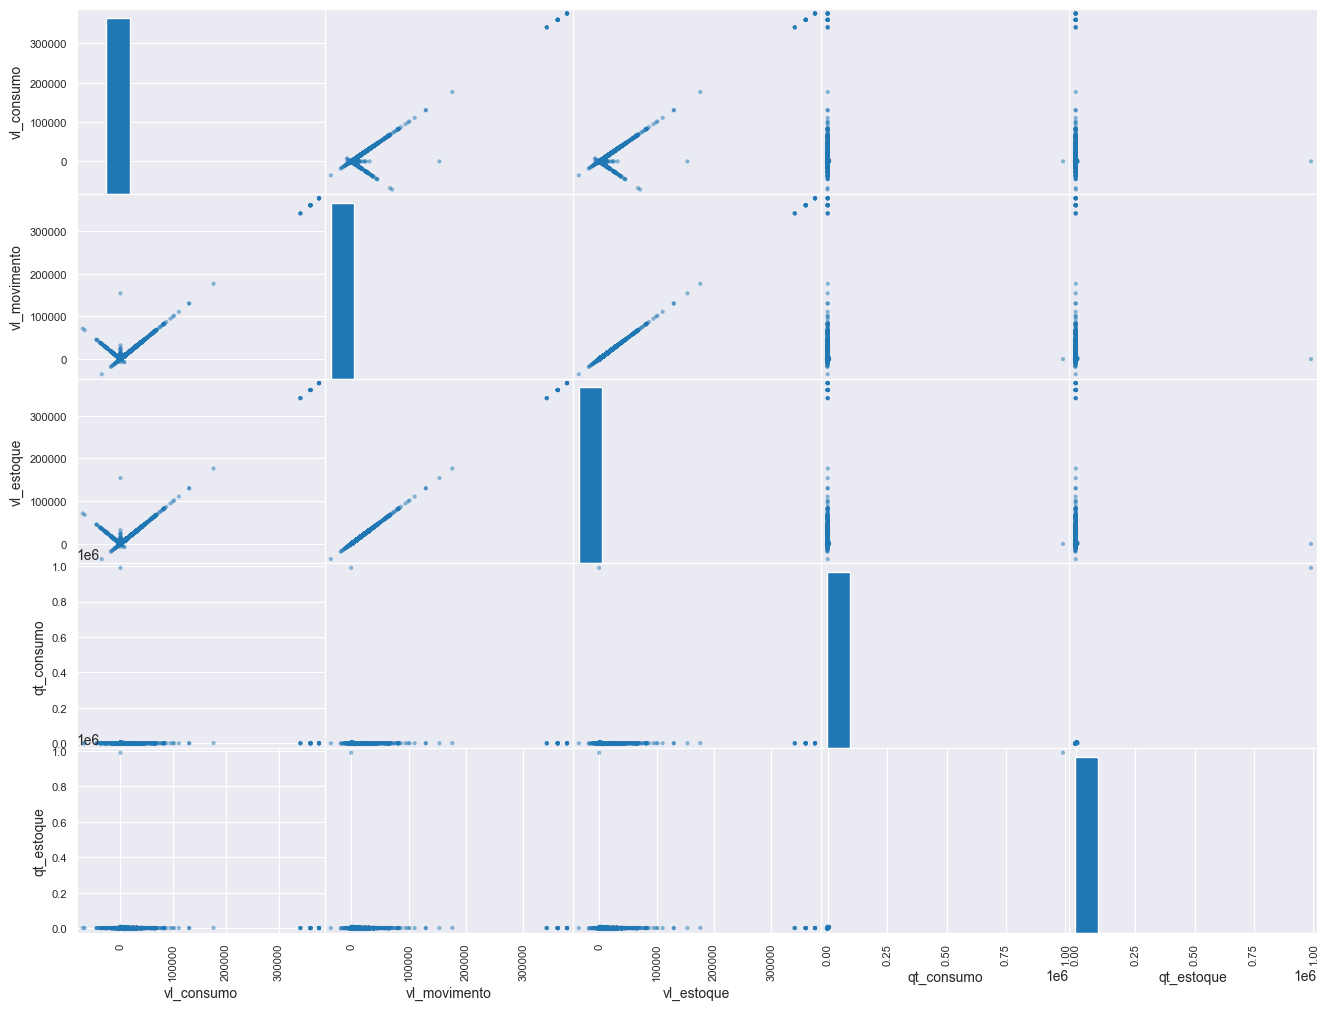

In [8]:
# Apresentar a matriz de correção da base

colunas_numericas = ['vl_consumo', 'vl_movimento', 'vl_estoque', 'qt_consumo', 'qt_estoque']
df_numerico = movimentacoes[colunas_numericas]
pd.plotting.scatter_matrix(df_numerico, figsize=(16,12))
plt.show()

In [9]:
def obter_maiores_correlacoes(dataframe, n=3):
    """
    Calcula e retorna os n pares de colunas com as maiores correlações (excluindo a autocorrelação).
    """
    # Seleciona apenas colunas numéricas
    dataframe_numerico = dataframe.select_dtypes(include=np.number)

    # Calcula a matriz de correlação
    matriz_corr = dataframe_numerico.corr().stack()

    # Remove a diagonal (autocorrelação)
    correlacoes_sem_autocorrelacao = matriz_corr[matriz_corr.index.get_level_values(0) != matriz_corr.index.get_level_values(1)]

    # Ordena os valores absolutos das correlações
    top_correlacoes = correlacoes_sem_autocorrelacao.abs().sort_values(ascending=False)

    # Retorna os top n pares e seus valores de correlação
    return top_correlacoes.head(n)

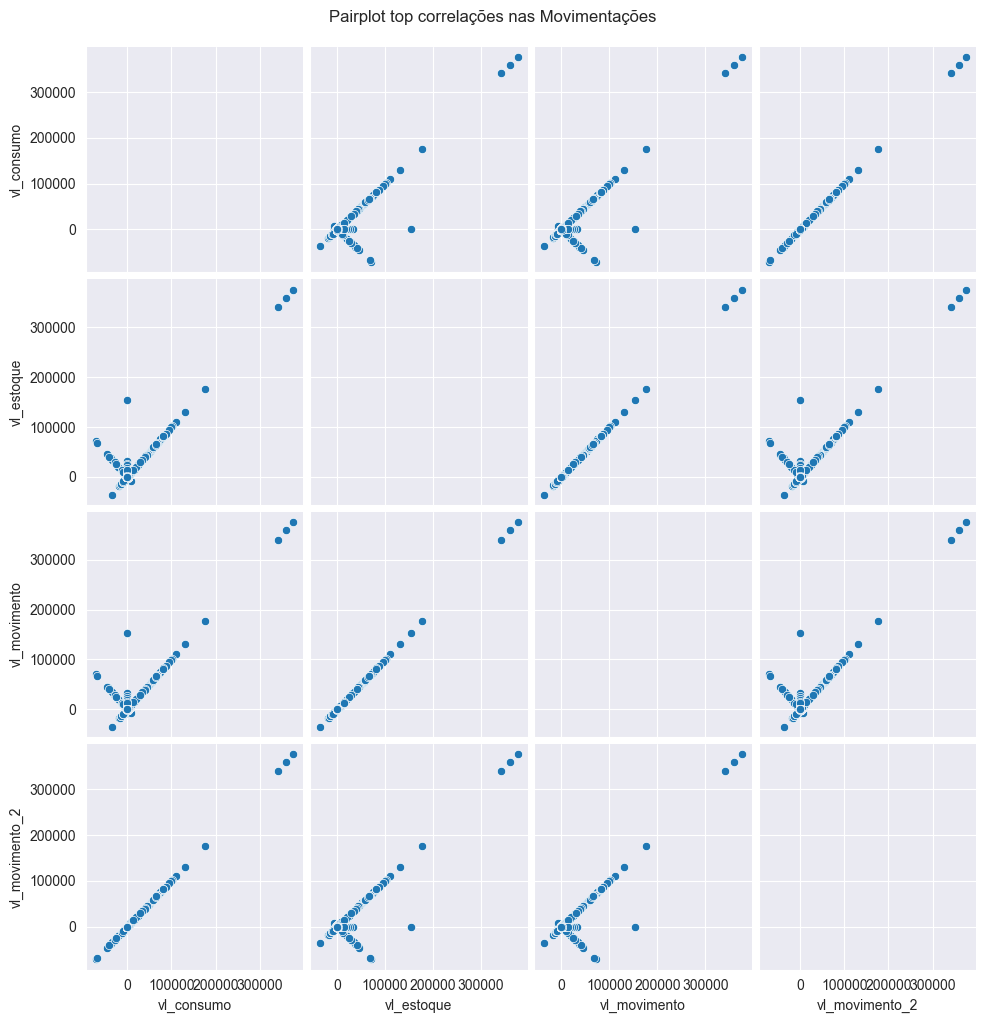

In [10]:
# Apresentar a matriz de correlação da base plotando no pairplot.
# Somente para as maiores correlações

# Obter os pares com maior correlação (sem considerar autocorrelaçaõ)
top_pares = obter_maiores_correlacoes(movimentacoes).index.tolist()
colunas_pairplot = list(set([col for pair in top_pares for col in pair]))

# Gera o pairplot
sns.pairplot(data=movimentacoes[colunas_pairplot])
plt.suptitle('Pairplot top correlações nas Movimentações', y=1.02)
plt.show()

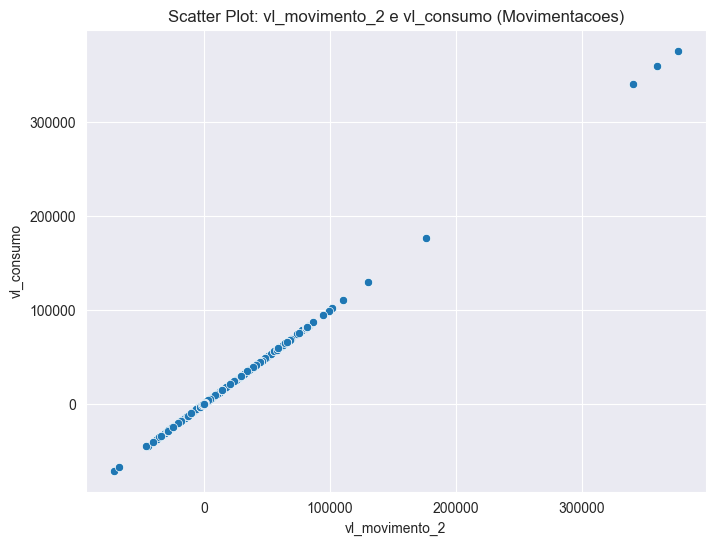

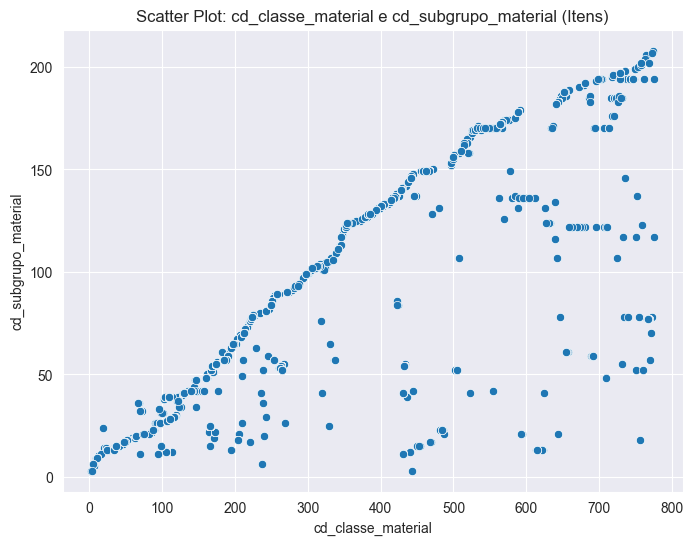

In [11]:
# Para apenas um par mais significativo de cada base, apresente o gráfico scatter para eles

# Obter o par com maior correlação em cada base
top_movimentacoes_corr = obter_maiores_correlacoes(movimentacoes, 1).index[0]
top_itens_corr = obter_maiores_correlacoes(itens, 1).index[0]

# Scatter plot para a base movimentações
plt.figure(figsize=(8, 6))
sns.scatterplot(data=movimentacoes, x=top_movimentacoes_corr[0], y=top_movimentacoes_corr[1])
plt.title(f'Scatter Plot: {top_movimentacoes_corr[0]} e {top_movimentacoes_corr[1]} (Movimentacoes)')
plt.xlabel(top_movimentacoes_corr[0])
plt.ylabel(top_movimentacoes_corr[1])
plt.show()

# Scatter plot para a base itens
plt.figure(figsize=(8, 6))
sns.scatterplot(data=itens, x=top_itens_corr[0], y=top_itens_corr[1])
plt.title(f'Scatter Plot: {top_itens_corr[0]} e {top_itens_corr[1]} (Itens)')
plt.xlabel(top_itens_corr[0])
plt.ylabel(top_itens_corr[1])
plt.show()

## Heatmap de correlação

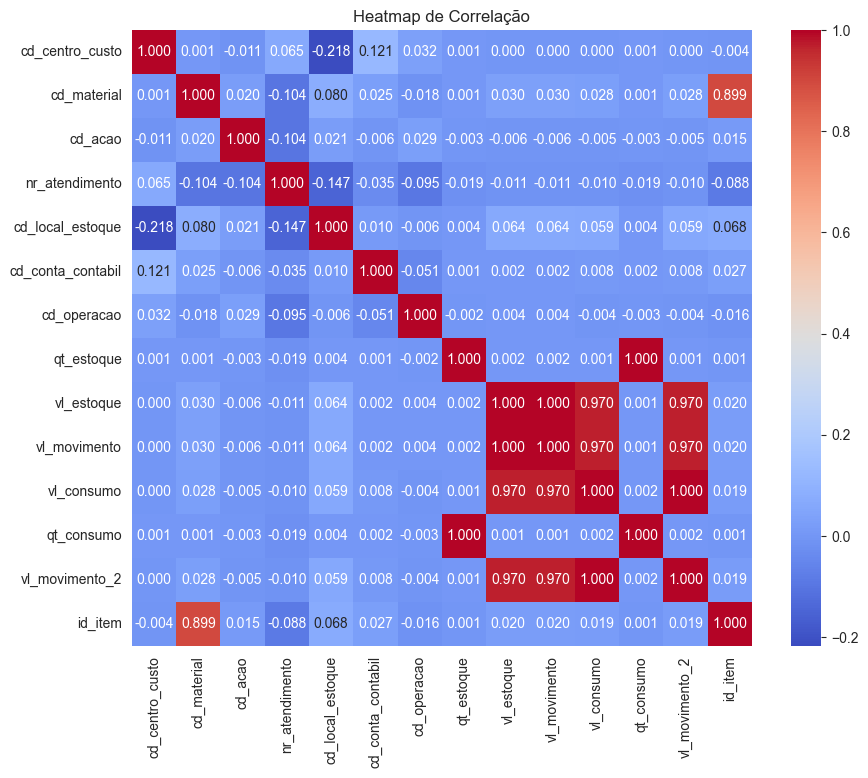

In [12]:
# Verificando a correlação entre os dados utilizando o heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(movimentacoes.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Heatmap de Correlação')
plt.show()

# **Conclusão: identifique quais colunas (variáveis) seriam utilizadas em um modelo de aprendizagem de máquina**
## **Relevantes para Previsão**


In [18]:
# Apresente as colunas eliminadas da versão final do Projeto UNIMED e justifique o por que

df = df.drop([
    'cd_conta_contabil',
    'dt_cadastramento',
    'dt_movimento_estoque',
    'id_item',
    'ie_ativo',
    'nr_atendimento',
], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877455 entries, 0 to 4877454
Data columns (total 19 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   ds_centro_custo            category      
 1   ds_estabelecimento         category      
 2   cd_acao                    int64         
 3   ds_local_estoque           category      
 4   ds_operacao                category      
 5   dt_referencia              datetime64[ns]
 6   qt_estoque                 float64       
 7   vl_estoque                 float64       
 8   vl_movimento               float64       
 9   vl_consumo                 float64       
 10  qt_consumo                 float64       
 11  ds_material_hospital       category      
 12  ds_classe_material         category      
 13  ds_subgrupo_material       category      
 14  ds_grupo_material          category      
 15  qt_conv_estoque_consumo    float64       
 16  ds_unidade_medida_compra   category 

### **Colunas possivelmente irrelevantes que ainda nao foram descartadas**
#### nr_atendimento: Altamente provável de ser irrelevante. O objetivo é identificar padrões de consumo em níveis  (por material, operação, centro de custo, etc.)
#### id_item: irrelevante, informação já fornecida em ds_material_hospital por ex
#### cd_conta_contabil: Provavelmente irrelevante, codigo
#### dt_movimento_estoque: Esta coluna representa o timestamp exato (data e hora) em que uma movimentação específica no estoque ocorreu- dt_referencia já traz a informação do mês
#### dt_cadastramento é a data de cadastro do item, irrelevante para análise de consumo.
#### ia_ativo, por fornecer apenas status do produto na base

In [20]:
# Apresente as colunas a serem utilizadas na versão final do Projeto UNIMED

colunas_para_visualizar = [
    'qt_consumo',
    'qt_estoque',
    'vl_movimento',
    'vl_estoque',
    'vl_consumo',
    'ds_material_hospital',
    'ds_classe_material',
    'ds_subgrupo_material',
    'ds_grupo_material'
]

display(df[colunas_para_visualizar].head())

,qt_consumo,qt_estoque,vl_movimento,vl_estoque,vl_consumo,ds_material_hospital,ds_classe_material,ds_subgrupo_material,ds_grupo_material
0,1.0,1.0,1.89,1.89,1.89,"Pilha Pequena ""AA"" Alcalina",Material de Expediente,Material de Expediente,Impressos e Material de Expediente
1,3.0,3.0,64.35,64.35,64.35,Papel Sulfite A4 Branco 210x297mm Pcte com 500...,Material de Expediente,Material de Expediente,Impressos e Material de Expediente
2,500.0,500.0,13.35,13.35,13.35,Stopper Cor da pele,Curativos,Curativos,Materiais Hospitalares
3,20.0,20.0,44.00,44.00,44.00,"Folha A4 com 8 etiquetas tamanho 7,5x10 cm Quí...",Material de Expediente,Material de Expediente,Impressos e Material de Expediente
4,1.0,1.0,1.82,1.82,1.82,Pincel Azul p/ Quadro Branco,Material de Expediente,Material de Expediente,Impressos e Material de Expediente


### Selecionamos as colunas com maior portencial para utilização na versão final do projeto: vl_consumo, vl_estoque, vl_movimento, qt_consumo e qt_estoque.
### Para fins de agrupamento selecionamos as possibilidades de descrição do material, classe, grupo e subgrupo

In [21]:
df.to_parquet('data/df_final.parquet', index=False)